In [68]:
import pandas as pd
import os
import gzip
import pickle
import openai
import re
import copy
from tqdm import tqdm
from torch import save,load
import time
import json

In [69]:
df = pd.read_csv('outputs/outputs_chunk_1.csv')

In [70]:
print(df.iloc[3]["output"]) #example: ```json{  "categories": [     "optimistic_speculation","altcoins"

```json
{
  "categories": [ 
    "bitcoin_technology",
    "bitcoin_mining"


In [71]:

categories = ["optimistic_speculation", "pessimistic_speculation", "bitcoin_adoption", "bitcoin_technology", "financial_products", "bitcoin_challenges", "scams", "bitcoin_mining", "altcoins", "educational_resources", "other"]


months = {}

# for i in range(1, 14):
for (i,file) in enumerate(os.listdir('outputs/')):
    i = i+1
    # print(i)
    df = pd.read_csv('outputs/' + file)
    for row in df.iterrows():
        row = row[1]
        index = row["index"]
        date = row["date"] # 2010-01-01 21:46:38
        output = row["output"]
        jsonoutput = output.replace("```json", "")+"]}"
        parsed = json.loads(jsonoutput)

        # for each month, get the sum of instances of each category
        month = str(date)[:7]
        if month == "nan":
            print(f"nan found, index: {index} date: {date} output: {output}")
            continue
        if month not in months:
            months[month] = {category: 0 for category in categories}
        for category in categories:
            if category in parsed["categories"]:
                months[month][category] += 1



nan found, index: nan date: nan output: ```json
{
  "categories": [ 
    "other"
nan found, index: nan date: nan output: ```json
{
  "categories": [ 
    "other"


In [72]:
months

{'2010-01': {'optimistic_speculation': 0,
  'pessimistic_speculation': 0,
  'bitcoin_adoption': 0,
  'bitcoin_technology': 6,
  'financial_products': 0,
  'bitcoin_challenges': 1,
  'scams': 0,
  'bitcoin_mining': 5,
  'altcoins': 0,
  'educational_resources': 8,
  'other': 3},
 '2010-02': {'optimistic_speculation': 0,
  'pessimistic_speculation': 0,
  'bitcoin_adoption': 0,
  'bitcoin_technology': 9,
  'financial_products': 0,
  'bitcoin_challenges': 1,
  'scams': 0,
  'bitcoin_mining': 2,
  'altcoins': 0,
  'educational_resources': 9,
  'other': 3},
 '2010-03': {'optimistic_speculation': 0,
  'pessimistic_speculation': 0,
  'bitcoin_adoption': 1,
  'bitcoin_technology': 4,
  'financial_products': 1,
  'bitcoin_challenges': 1,
  'scams': 0,
  'bitcoin_mining': 1,
  'altcoins': 0,
  'educational_resources': 5,
  'other': 3},
 '2010-04': {'optimistic_speculation': 0,
  'pessimistic_speculation': 0,
  'bitcoin_adoption': 0,
  'bitcoin_technology': 4,
  'financial_products': 0,
  'bitcoin

In [73]:
df = pd.DataFrame(columns=["month"] + categories)
for month in months:
    row = {"month": month}
    for category in categories:
        row[category] = months[month][category]
    df = pd.concat([df, pd.DataFrame([row])])

df = df.sort_values(by="month")
df.to_csv('raw_values.csv', index=False)

In [74]:
# Obtain a categorical distribution for each month
for index, row in df.iterrows():
    total = sum(df.loc[index, category] for category in categories)
    print(total)
    for category in categories:
        df.loc[index, category] = df.loc[index, category] / total


df.to_csv('normalized_values.csv', index=False)

0     23
0     24
0     16
0     17
0      6
    ... 
0    435
0    469
0    469
0    316
0    224
Length: 171, dtype: object
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
    ... 
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Length: 171, dtype: object
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
    ... 
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Length: 171, dtype: object
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
    ... 
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Length: 171, dtype: object
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
    ... 
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Length: 171, dtype: object
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
    ... 
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Length: 171, dtype: object
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
    ... 
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Length: 171, dtype: object
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
    ... 
0    1.0
0    1.0
0    1.0
0    1.0
0    1.0
Length: 171, dtype:

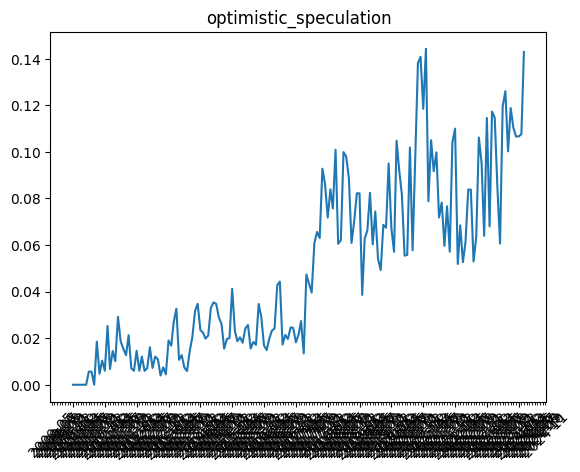

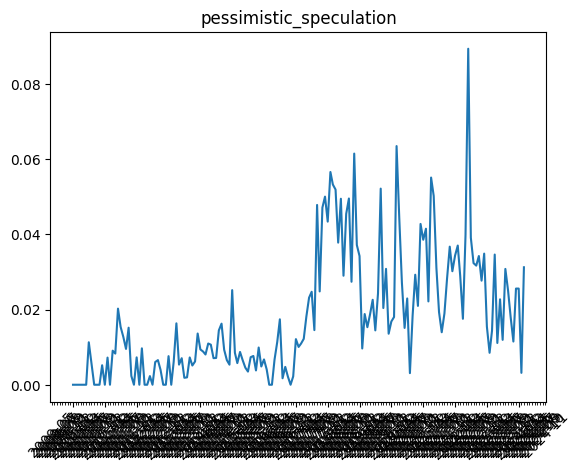

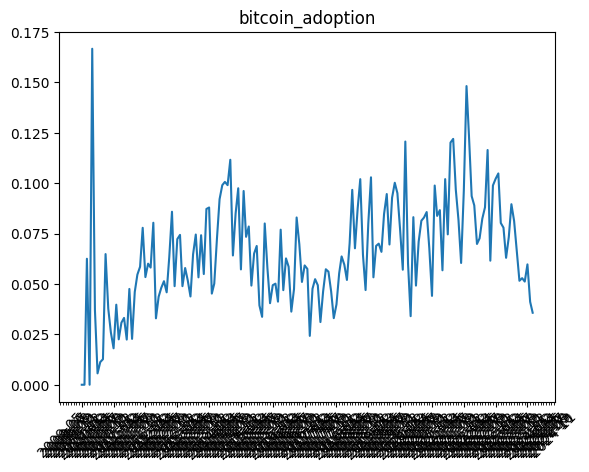

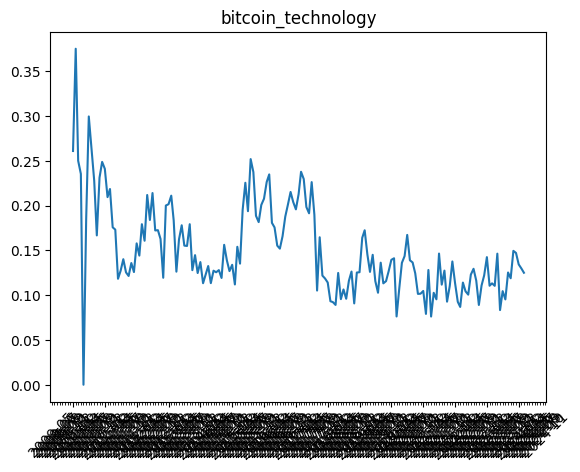

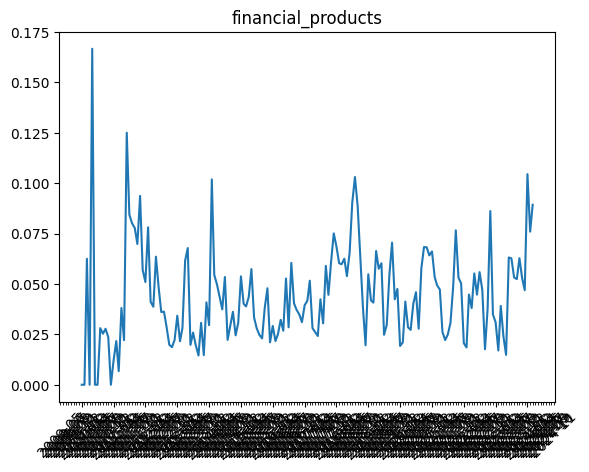

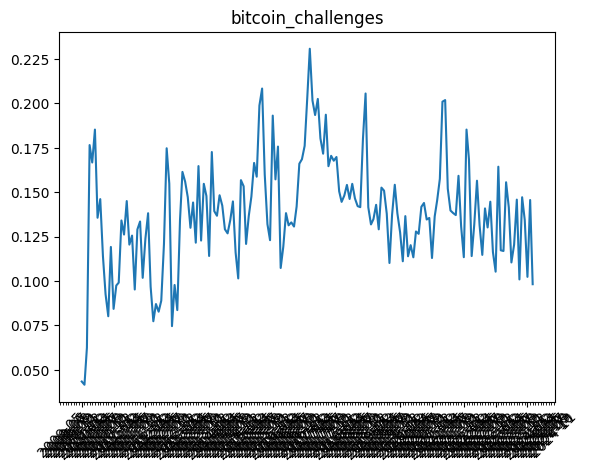

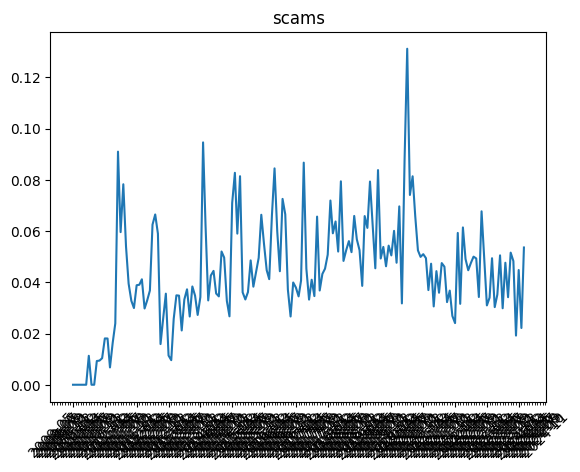

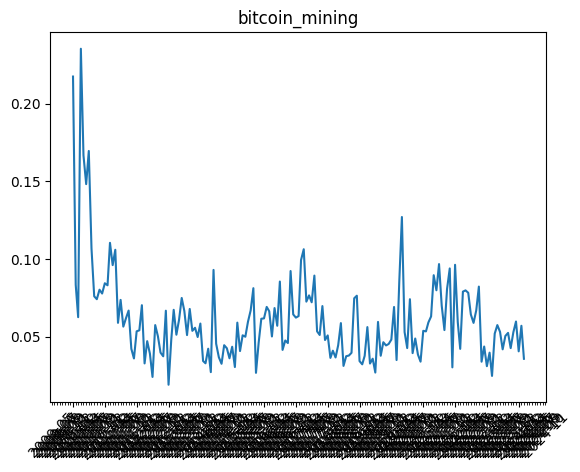

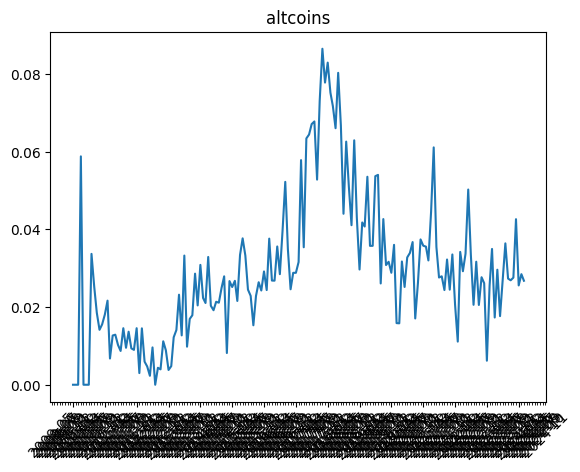

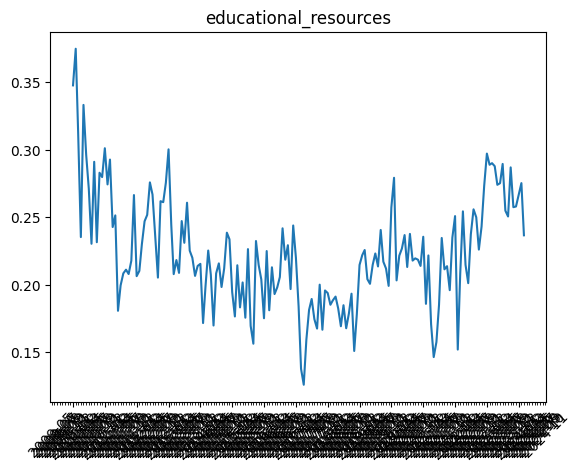

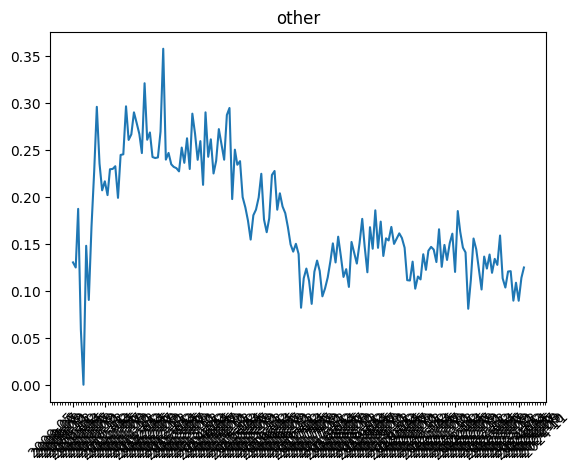

In [75]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

df = pd.read_csv('normalized_values.csv')
df["month"] = pd.to_datetime(df["month"])
df = df.set_index("month")

# make a plot for each category

for category in categories:
    fig, ax = plt.subplots()
    ax.plot(df.index, df[category])
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_tick_params(rotation=45)
    ax.xaxis.set_tick_params(which='minor', rotation=45)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%Y-%m'))
    ax.set_title(category)
    plt.show()